In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
ST1 = pd.read_csv('F60Lim.csv', sep=';', parse_dates=['FyH'], dayfirst =True)
ST1.dtypes

FyH       datetime64[ns]
Equity             int64
dtype: object

In [100]:
ST1=ST1.rename(columns={'Equity':'Eq'})
ST1['Incr'] = ST1['Eq'].pct_change()
ST1 = ST1[ST1['Incr'] != 0]
ST1['Peak']= (ST1['Incr'] * ST1['Incr'].shift(-1)) < 0
ST1.head(30)

,FyH,Eq,Incr,Peak
0,2016-07-06 11:00:00,1000,NaN,False
1,2016-07-06 12:00:00,1001,0.001000,False
2,2016-07-06 13:00:00,1003,0.001998,False
3,2016-07-06 14:00:00,1004,0.000997,False
4,2016-07-06 15:00:00,1005,0.000996,True
5,2016-07-06 16:00:00,999,-0.005970,False
6,2016-07-06 17:00:00,996,-0.003003,True
7,2016-07-06 18:00:00,1016,0.020080,False
8,2016-07-06 19:00:00,1031,0.014764,False
9,2016-07-06 20:00:00,1034,0.002910,False


array([<matplotlib.axes._subplots.AxesSubplot object at 0x118eeb860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119082eb8>], dtype=object)

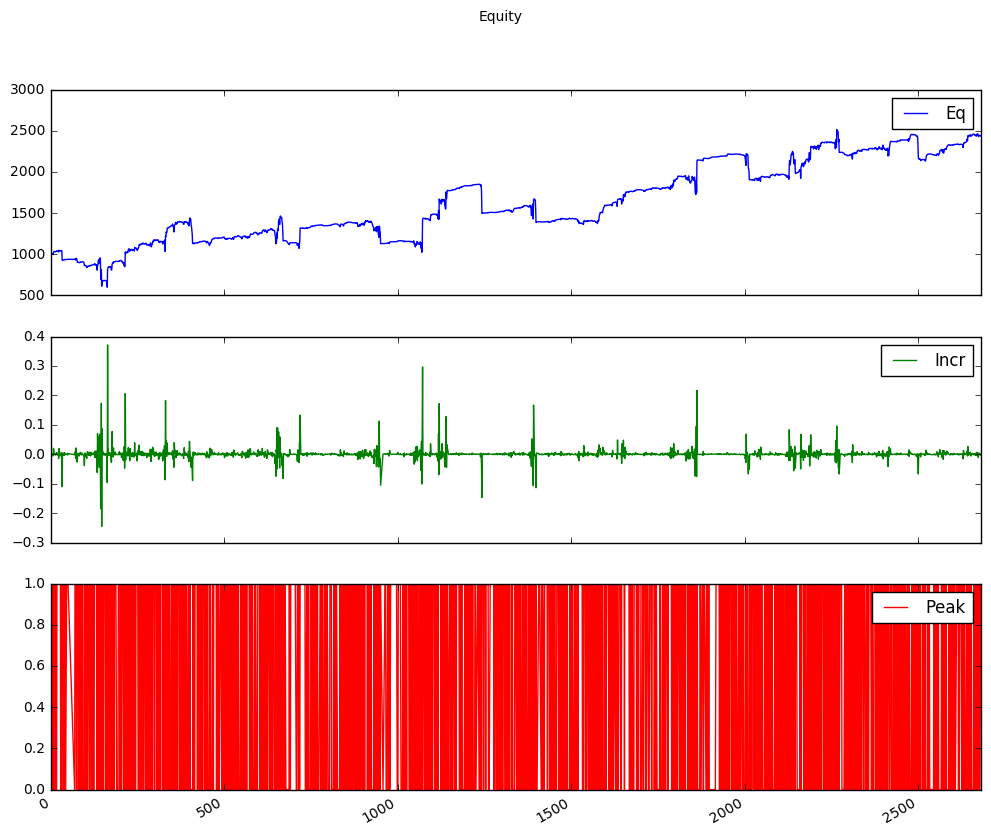

In [89]:
ST1.plot(subplots=True, figsize=(12,10), title = 'Equity')

In [ ]:
ST1

In [96]:
ST2 = ST1[(ST1['Peak'] == True)]

In [97]:
ST2['EqAnt']=ST2['Eq'].shift(1)

ST2['FyHAnt']=ST2['FyH'].shift(1)

ST2['Lapso']=ST2['FyH']-ST2['FyHAnt']

ST2['GyP']=ST2['Eq']-ST2['EqAnt']

/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [99]:
ST2

,FyH,Eq,Incr,Peak,EqAnt,FyHAnt,Lapso,GyP
4,2016-07-06 15:00:00,1005,0.000996,True,NaN,NaT,NaT,NaN
6,2016-07-06 17:00:00,996,-0.003003,True,1005.0,2016-07-06 15:00:00,0 days 02:00:00,-9.0
10,2016-07-06 21:00:00,1035,0.000967,True,996.0,2016-07-06 17:00:00,0 days 04:00:00,39.0
13,2016-07-07 00:00:00,1029,-0.002907,True,1035.0,2016-07-06 21:00:00,0 days 03:00:00,-6.0
17,2016-07-07 04:00:00,1044,0.005780,True,1029.0,2016-07-07 00:00:00,0 days 04:00:00,15.0
18,2016-07-07 05:00:00,1042,-0.001916,True,1044.0,2016-07-07 04:00:00,0 days 01:00:00,-2.0
19,2016-07-07 06:00:00,1043,0.000960,True,1042.0,2016-07-07 05:00:00,0 days 01:00:00,1.0
20,2016-07-07 07:00:00,1041,-0.001918,True,1043.0,2016-07-07 06:00:00,0 days 01:00:00,-2.0
21,2016-07-07 08:00:00,1042,0.000961,True,1041.0,2016-07-07 07:00:00,0 days 01:00:00,1.0
22,2016-07-07 09:00:00,1027,-0.014395,True,1042.0,2016-07-07 08:00:00,0 days 01:00:00,-15.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x104889e48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a709ba8>], dtype=object)

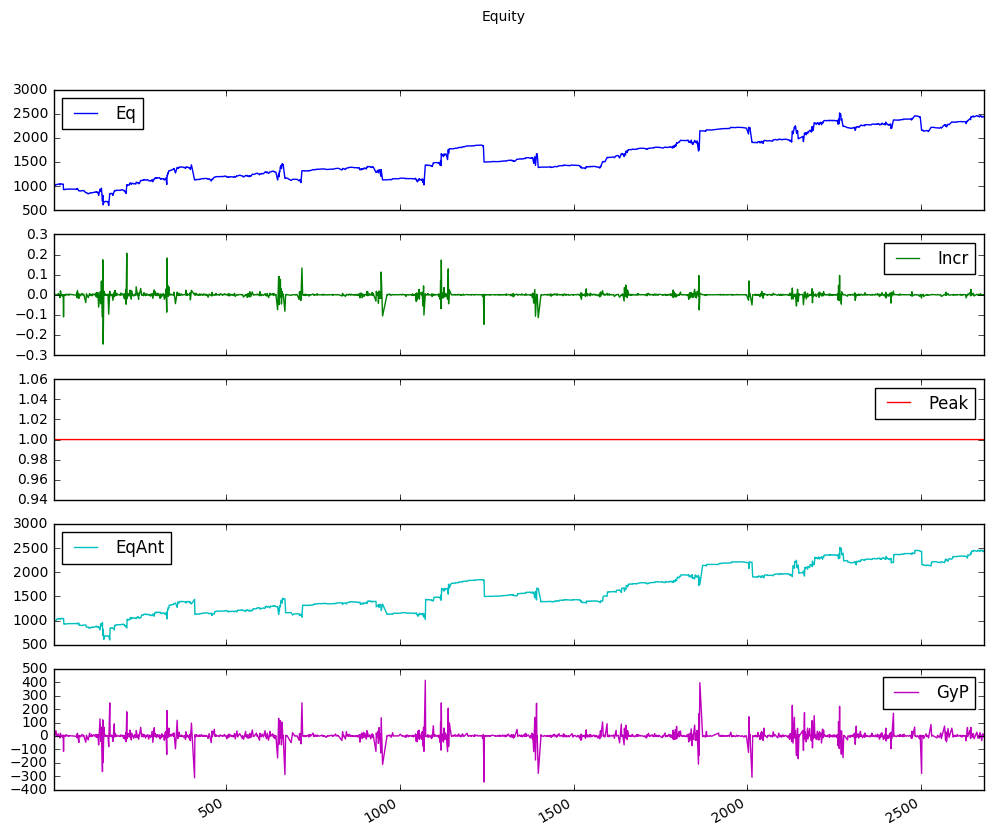

In [98]:
ST2.plot(subplots=True, figsize=(12,10), title = 'Equity')

In [65]:
ST2.to_csv('F60Lim2.csv', sep=";")